# Stochastic Gradient Descent (SGD)

<div style="width: 100%; overflow: hidden;">
     <div style="width: 75%; float: left;"> 
     This notebook presents the Stochastic Gradient Descent (SGD), which is a popular algorithm frequently used in the field of machine learning. The example describes a single layer neural network with logistic regression for breast cancer prediction. The proposed model is analytically derived and implemented using the Numpy library to demonstrate the core functionality of training and testing. Nonetheless, a Pytorch equivalent of the model is given further below for validation purposes. <br>
     <br>last update: 23/06/2024
     </div>
     <div style="margin-left: 80%;">
        <b>Author</b><br><br>
        <a href='http://www.christopherhahne.de', style="text-decoration: None; text-align: left;">
            <img align="left" src="http://www.christopherhahne.de/images/about.jpg" width="78"/>
            <br><br><br><br><br><br>
            <b>Christopher<br>Hahne, PhD</b>
        </a>
    </div>
</div>

## Data acquisition

For our classification example, we employ real data using the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). It consists of $N=569$ test persons with 2 classes (malignant and benign) defined as $y_i \in \{0,1\}$ and $J=30$ measured attributes per person $i$ given as a feature vector $\mathbf{x}_i\in\mathbb{R}^{J\times 1}$.

In [1]:
# import required packages
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load data
bc = load_breast_cancer()

# normalize
x_min = np.min(bc.data, 0)
x_scale = 3*np.std(bc.data-x_min, 0)
bc_norm = (bc.data-x_min) / x_scale

# split data into training and validation set
train_X, val_X, train_y, val_y = train_test_split(bc_norm, bc.target, random_state=42)
class_labels = bc.target_names

# plot shapes
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape)

(426, 30) (426,) (143, 30) (143,)


## Gradient descent

Stochastic Gradient Descent (SGD) is a variant of the gradient descent algorithm used to learn weight parameters of a multi-layer perceptron, particularly useful for training large datasets. The weights of the model are updated iteratively. Models trained using SGD are found to generalize better on unseen data.

### Optimization

For a stochastic regression, a predicted value $\hat{y}$ is a scalar composed by $\hat{y}_i=\mathbf{x}_i^\intercal\mathbf{w}$ where a vector $\mathbf{w}=\left[w^{(1)}, w^{(2)}, \dots, w^{(J)}\right]^\intercal$ consists of weights $w^{(j)}$ for each feature $j$ and the vector $\mathbf{x}_i=\left[x_i^{(1)}, x_i^{(2)}, \dots, x_i^{(J)}\right]^\intercal$ represents a data sample with $J$ features while $i$ is the sample index from a set with total number of $N$ samples. Note that we add a feature vector of $[1, 1, \dots, 1] \in \mathbb{R}^{N}$ to the data set to embed and train the bias as variable $w^{(1)}$ instead of treating it as a separate variable. Our predicted class value $\hat{y}$ is supposed to match its actual class $y$ for which a least-squares cost metric $(\hat{y}-y)^2$ may be a reasonable choice. Similar to conventional optimization, SGD aims to minimize an objective function $F(\mathbf{w})$, which may be defined as a mean squared error

$$
F(\mathbf{w})=\frac{1}{N}\sum_{i=1}^N f\left(\mathbf{w}, \mathbf{x}_i, y_i\right)=\frac{1}{N}\sum_{i=1}^N\left(\hat{y}_i-y_i\right)^2=\frac{1}{N}\sum_{i=1}^N\left(\mathbf{x}_i^\intercal\mathbf{w}-y_i\right)^2
$$

where $f\left(\mathbf{w}, \mathbf{x}_i, y_i\right)=\left(\mathbf{x}_i^\intercal\mathbf{w}-y_i\right)^2$ represents the **loss function**. In the machine learning context, the term **training** refers to an optimization problem where weight parameters $\mathbf{w}$ are adjusted so that the objective function is minimized which formally 

$$
\text{arg min}_{\mathbf{w}} \, F(\mathbf{w})
$$

To achieve this, SGD inherits the **Gradient Descent** update method at iteration $k$ (also known as **back-propagation**), which writes

$$
\mathbf{w}_{k+1} = \mathbf{w}_k - \gamma \, \nabla_{\mathbf{w}_k} f\left(\mathbf{w}_k, \mathbf{x}_i, y_i\right) \, , \, \forall i
$$

where $\gamma$ denotes the learning rate and $\nabla_{\mathbf{w}_k} f\left(\mathbf{w}_k, \mathbf{x}_i, y_i\right)$ is the gradient of the loss function with respect to the weights $\mathbf{w}_k$. Here, the gradient $\nabla_{\mathbf{w}} f\left(\mathbf{w}, \cdot \right)$ can be generally obtained by

$$
\nabla_{\mathbf{w}} f\left(\mathbf{w}, \mathbf{x}_i, y_i\right) = \frac{\partial f\left(\mathbf{w}, \mathbf{x}_i, y_i\right)}{\partial \mathbf{w}}
=
\begin{bmatrix} 
\frac{\partial}{\partial \mathbf{w}^{(1)}} f\left(\mathbf{w}, \mathbf{x}_i, y_i\right) \\
\frac{\partial}{\partial \mathbf{w}^{(2)}} f\left(\mathbf{w}, \mathbf{x}_i, y_i\right) \\
\vdots \\
\frac{\partial}{\partial \mathbf{w}^{(J)}} f\left(\mathbf{w}, \mathbf{x}_i, y_i\right) \\
\end{bmatrix}
=
\begin{bmatrix} 
\mathbf{x}_i^{(1)} 2\left(\mathbf{x}_i^\intercal\mathbf{w}-y_i\right) \\
\mathbf{x}_i^{(2)} 2\left(\mathbf{x}_i^\intercal\mathbf{w}-y_i\right) \\
\vdots \\
\mathbf{x}_i^{(J)} 2\left(\mathbf{x}_i^\intercal\mathbf{w}-y_i\right) \\
\end{bmatrix}
$$

and written in compact vector notation

$$
\nabla_{\mathbf{w}} f(\mathbf{w}, \mathbf{x}_i, y_i) = 2\mathbf{x}_i^\intercal\left(\mathbf{x}_i^\intercal\mathbf{w}-y_i\right)
$$

where $^\intercal$ denotes the transpose. Iteration through the entire data set $\forall i \in \{1, \dots, N\}$ is referred to as one *epoch*. The resulting weights $\mathbf{w}$ have shown to be improved by letting the optimization procedure see the training data several times. This means that SGD sweeps through the entire dataset for several epochs.

### Mini-Batching

Completion of a single epoch is often sub-divided in bundled subsets of samples, so-called *batches*, of size $B$ where $B<N$. While $B=1$ in classical SGD, mini-batching requires $B>1$, which helps reduce the variance in each parameter update. The batch size can be chosen to be a power-of-two for better performance from available matrix multiplication libraries. In practice, we determine how many training examples will fit on the GPU or main memory and then use it as the batch size.

## Implementation

In [2]:
# learning rate is the step size as in classical gradient descent
l_rate = 1e-3

# epochs is the number of maximum iterations for minimization
epochs = 700

# batch size amounts to the number of samples used in one epoch iteration (up to hardware memory)
b_size = 2**4
assert b_size <= train_X.shape[0]

# insert column of ones as first feature entry to cover bias as a trainable parameter within the weight vector (instead of separate variable)
train_X, val_X = np.c_[np.ones(train_X.shape[0]), train_X], np.c_[np.ones(val_X.shape[0]), val_X]

# initialize weight vector such it has the same number of columns as input features
np.random.seed(1111)
w = np.random.uniform(size=(train_X.shape[1],)) * 0.1

# initialize a list to track the loss value for each epoch
loss_list = []

# batch composition
def next_batch(X, y, b_size):
    
    # loop over our dataset in mini-batches
    for i in np.arange(0, X.shape[0], b_size):
        
        # yield a tuple for current batch of data and labels
        yield (X[i:i+b_size], y[i:i+b_size])

for epoch in range(epochs+1):
    
    # reset total epoch loss
    epoch_loss = []
    
    # loop over data in batches
    for (batch_X, batch_y) in next_batch(train_X, train_y, b_size):
        
        # take dot product between current feature batch and weights
        preds_y = np.dot(batch_X, w)
        
        # compare prediction and true values
        diff = preds_y - batch_y
        
        # compute mean of squared loss for current batch
        epoch_loss.extend(diff**2)

        # compute the derivative
        gradient = 2 * np.dot(batch_X.T, diff)
        
        # scale gradient of current batch to step in the correct direction
        w -= l_rate * gradient
        
    # update loss list by taking average across all batches
    loss_list.append(np.mean(epoch_loss))

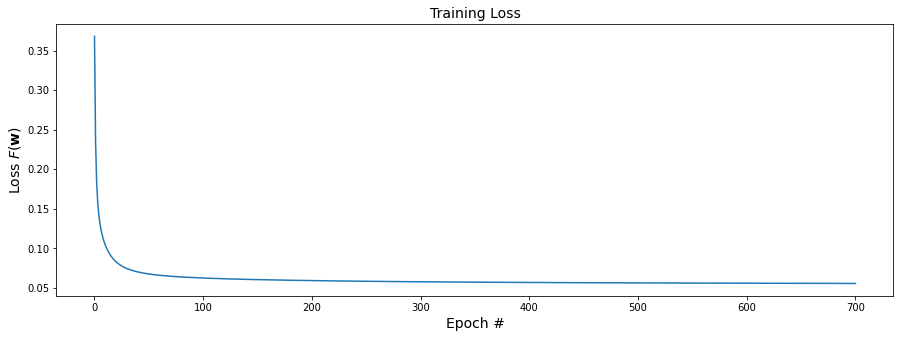

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
# plot loss function
plt.plot(range(len(loss_list)), loss_list)
plt.title('Training Loss', fontsize=14)
plt.xlabel('Epoch #', fontsize=14)
plt.ylabel('Loss $F(\mathbf{w})$', fontsize=14)
plt.show()

## Validation

### Activation function
In logistic regression, we desire a classification label $\mathring{y}$ that only has two possible values whereas, so far, our model employs linear combinations $\hat{y}_i=\mathbf{x}_i\mathbf{w}$ that yield results in the $\hat{y}_i \in (-\infty, \infty)$ range. Thus, we seek a continuous function that maps real numbers $\hat{y}_i=\mathbf{\hat{y}} \in \mathbb{R}^N$ to the $(0,1)$ codomain. A function that satisfies this condition is the *sigmoid function*, also known as *standard logistic function*, given by

$$
\sigma(\hat{y}_i)=\frac{1}{1+\exp(-\hat{y}_i)}
$$

In [4]:
sigmoid = lambda y: 1.0 / (1 + np.exp(-y))

The returned value $\sigma_i \in (0,1)$ of the activation function is then assigned a predicted label $\mathring{y}_i \in \{0,1\}$ which is negative if it is closer to 0 and positive in case it is closer to 1, so that

$$
\mathring{y}_i=
\begin{cases}
    1,  & \text{if } \sigma_i \geq \tau\\
    0,  & \text{otherwise}
\end{cases}
$$

where $\tau$ is an adjustable threshold scalar. Here, we estimate an ideal threshold via [Youden's method](https://en.wikipedia.org/wiki/Youden%27s_J_statistic).

In [5]:
# threshold estimation
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(train_y, np.dot(train_X, w))
tau = thresholds[np.argmax(tpr - fpr)]

# compute predictions from test set
pred_y = (sigmoid(np.dot(val_X, w)) >= tau).astype('uint8')

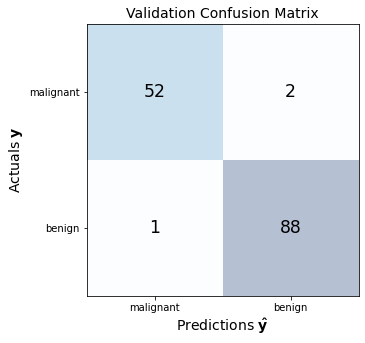

In [6]:
# compose confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=val_y, y_pred=pred_y)

# print confusion matrix
fig, ax2 = plt.subplots(1, 1, figsize=(15,5))
ax2.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax2.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', size='xx-large')

ax2.set_title('Validation Confusion Matrix', fontsize=14)
ax2.set_xlabel('Predictions $\mathbf{\hat{y}}$', fontsize=14)
ax2.set_ylabel('Actuals $\mathbf{y}$', fontsize=14)
ax2.set_yticks([0, 1])
ax2.set_xticks([0, 1])
ax2.set_yticklabels(class_labels)
ax2.set_xticklabels(class_labels)
ax2.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
plt.show()

### Loss animation

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#plt.style.use('seaborn-notebook')

# animated figure that plots the loss over time
fig, ax = (plt.figure(figsize=(8, 5)), plt.axes())
ax.set_xlabel('Epoch #', fontsize=16)
ax.set_ylabel('Loss $F(\mathbf{w})$', fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
line, = ax.semilogy(range(len(loss_list)), loss_list, lw=2)
point, = ax.plot(0, np.nan, 'r', marker='.', markersize=14)
plt.tight_layout()
plt.close()
# animation
div = 50
def animate(i):
    line.set_data(np.arange(len(loss_list))[:i*div], loss_list[:i*div])
    point.set_data(i*div, loss_list[i*div])
    return line, point

anim = FuncAnimation(fig, animate, interval=div, frames=epochs//div+1)

if False:
    anim.save('./img/sgd_anim.gif', writer='imagemagick', fps=5)

    HTML(anim.to_jshtml())

In [8]:
# TP/(TP+FP)
precision = lambda conf_mat: conf_mat[0, 0]/(conf_mat[0, 0]+conf_mat[1, 0]) * 100
print('%.2f %% Precision' % precision(conf_mat))

# TP/(TP+FN)
recall = lambda conf_mat: conf_mat[0, 0]/(conf_mat[0, 0]+conf_mat[0, 1]) * 100
print('%.2f %% Recall' % recall(conf_mat))

# (TP+TN)/ALL
accuracy = lambda conf_mat: (conf_mat[0, 0]+conf_mat[1, 1])/np.sum(conf_mat) * 100
print('%.2f %% Accuracy' % accuracy(conf_mat))

98.11 % Precision
96.30 % Recall
97.90 % Accuracy


## Overfitting validation

In statistical learning, we want to make sure that the classification performs equally well on test and training data. Therefore, we employ the Mean-Squared Error (MSE) given by
$$
\text{MSE}(\mathbf{\hat{y}}, \mathbf{y})=\frac{1}{N}\sum_{i=1}^N \left(\hat{y}_i-y_i\right)^2
$$
on both sets while aiming for
$\text{MSE}(\mathbf{\hat{y}}_{\text{test}}, \mathbf{y}_{\text{test}}) \approx \text{MSE}(\mathbf{\hat{y}}_{\text{train}}, \mathbf{y}_{\text{train}})$. If this fails, it gives indication for either under- or overfitting of the trained weights $\mathbf{w}$.

In [9]:
# mean squared error
MSE = lambda y, pred_y: np.round(sum((y-pred_y)**2)/len(y), 4)

# compute predictions of test and training sets
pred_val_y = np.round(sigmoid(np.dot(val_X, w))).astype('uint8')
pred_train_y = np.round(sigmoid(np.dot(train_X, w))).astype('uint8')

# compare MSEs
val_MSE = MSE(val_y, pred_val_y)
train_MSE = MSE(train_y, pred_train_y)
res = np.isclose(val_MSE, train_MSE, rtol=.95)

if res:
    print('MSEs are close enough with %s (test) and %s (train).' % (val_MSE, train_MSE))
else:
    print('Potential over-/underfitting from MSEs with %s (test) and %s (train).' % (val_MSE, train_MSE))

MSEs are close enough with 0.2238 (test) and 0.2582 (train).


## PyTorch equivalent

Neural network models are often defined using PyTorch's *Module* class, which offers inheritance from Object-Oriented Programming (OOP). Variables of other types (e.g. numpy) have to be converted to torch data types to enable the convenient automatic gradient computation. The model, optimizer (here SGD) and loss function are instantiated before training.

In [10]:
import torch
torch.manual_seed(1111)

# define single layer model
class SingleLayerNet(torch.nn.Module):
    def __init__(self, n_features):
        super(SingleLayerNet, self).__init__()
        self.linear = torch.nn.Linear(n_features, 1, bias=True)
        torch.nn.init.uniform_(self.linear.weight, 0, 1e-1)
        
    def forward(self, X):
        z = self.linear(X)
        return torch.squeeze(z, 1)
    
# convert to torch data types
train_Xt = torch.autograd.Variable(torch.FloatTensor(train_X))
train_yt = torch.autograd.Variable(torch.FloatTensor(train_y))
val_Xt = torch.autograd.Variable(torch.FloatTensor(val_X))
val_yt = torch.autograd.Variable(torch.FloatTensor(val_y))

# instantiate model and loss
model = SingleLayerNet(n_features=train_Xt.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)
criterion = torch.nn.MSELoss()

# training
loss_list = []
for epoch in range(epochs+1):
    # loop over data in batches
    for i_X, i_y in next_batch(train_Xt, train_yt, b_size):
        pred_y = model(i_X)
        loss = criterion(pred_y, i_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # track loss
    loss_list.append(loss.item())
    if epoch % 100 == 0:
        y_val_pred = model(val_Xt)
        y_train_pred = model(train_Xt)
        val_loss = criterion(y_val_pred, val_yt)
        train_loss = criterion(y_train_pred, train_yt)
        pred_yt = sigmoid(y_val_pred.detach().numpy()) >= tau
        conf_mat = confusion_matrix(y_true=val_yt.numpy(), y_pred=pred_yt)
        val_acc = accuracy(conf_mat)
        train_acc = accuracy(conf_mat)
        print(
            f'''epoch {epoch}
            Train set - loss: {np.round(train_loss.detach().numpy().astype('float'), 3)}, accuracy: {np.round(train_acc, 3)}
            Validation  set - loss: {np.round(val_loss.detach().numpy().astype('float'), 3)}, accuracy: {np.round(val_acc, 3)}
            ''')

if False:
    torch.save(model, 'torch_sgd_model.pth')

epoch 0
            Train set - loss: 0.445, accuracy: 12.587
            Validation  set - loss: 0.448, accuracy: 12.587
            
epoch 100
            Train set - loss: 0.102, accuracy: 93.007
            Validation  set - loss: 0.087, accuracy: 93.007
            
epoch 200
            Train set - loss: 0.081, accuracy: 95.105
            Validation  set - loss: 0.073, accuracy: 95.105
            
epoch 300
            Train set - loss: 0.073, accuracy: 95.804
            Validation  set - loss: 0.067, accuracy: 95.804
            
epoch 400
            Train set - loss: 0.069, accuracy: 96.503
            Validation  set - loss: 0.064, accuracy: 96.503
            
epoch 500
            Train set - loss: 0.066, accuracy: 96.503
            Validation  set - loss: 0.063, accuracy: 96.503
            
epoch 600
            Train set - loss: 0.065, accuracy: 96.503
            Validation  set - loss: 0.061, accuracy: 96.503
            
epoch 700
            Train set - loss: 0.0

In [11]:
# threshold estimation
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(train_yt, model(train_Xt).detach())
tau = thresholds[np.argmax(tpr - fpr)]

# compute predictions from test set
pred_yt = sigmoid(y_val_pred.detach()) >= tau

In [12]:
conf_mat = confusion_matrix(y_true=val_yt, y_pred=pred_yt)

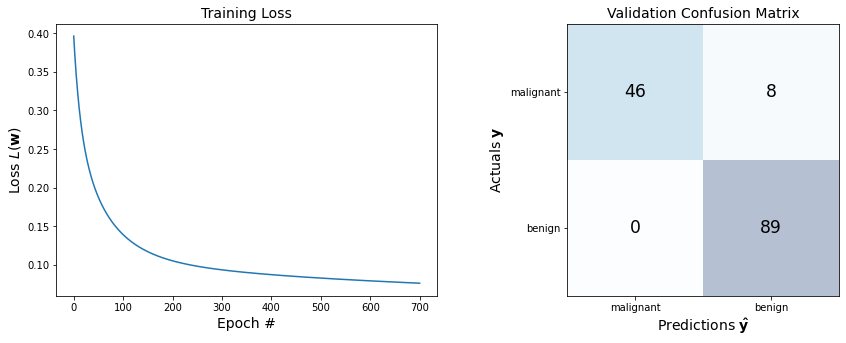

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot loss function
ax1.plot(range(len(loss_list)), loss_list)
ax1.set_title('Training Loss', fontsize=14)
ax1.set_xlabel('Epoch #', fontsize=14)
ax1.set_ylabel('Loss $L(\mathbf{w})$', fontsize=14)

# print confusion matrix
ax2.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax2.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', size='xx-large')

ax2.set_title('Validation Confusion Matrix', fontsize=14)
ax2.set_xlabel('Predictions $\mathbf{\hat{y}}$', fontsize=14)
ax2.set_ylabel('Actuals $\mathbf{y}$', fontsize=14)
ax2.set_yticks([0, 1])
ax2.set_xticks([0, 1])
ax2.set_yticklabels(class_labels)
ax2.set_xticklabels(class_labels)
ax2.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
plt.show()